<a href="https://colab.research.google.com/github/alexvanhalen/alexvanhalen.github.io/blob/master/%E8%A5%BF%E6%BF%95%E8%88%87%E6%9D%B1%E7%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **西濕與東瓜**
作者：何岳庭

---


從前，路很遠，車馬慢，腳步也深，慢到一生只夠愛一個人。
  那是個仍以書信傳送愛情的時代，有位西域姑娘名不詳，但據說她總是倚著窗邊哀聲嘆氣，因為遲遲等不到心上人的來信，所以時常哭到下面很濕（是下面的地板很濕），也因此被稱為「西濕」。日暮西山，別過身，期望再一次落空，她的剪影被夕暈拉得好長好長，直至消失在地球最末的地平線……
  遠在東方的東瓜，也就是西濕的心上人，佇立在東方明珠塔上，一陣風輕拂過東瓜的髯鬚，讓他不禁高聲喊著：「起秋了！」隨即思念之情也被秋風撩起，決定振筆疾書，譜出一首動人的「東」季戀歌。
  費盡千辛萬苦，洋洋灑灑寫了三天三夜，東瓜望著自己的一撇一捺，不勝唏噓著：「只能說紙短情長啊！」原本在一旁打盹的小書僮馬上吐槽：「紙哪裡短？都從東方明珠塔頂垂到地上了。」
「哈哈哈，你懂文采嗎？還是懂得愛人？趕緊去幫我把信寄了唄。北七。」東瓜大笑三聲後說道。
  小書僮還來不及開口問要寄給誰還有要用什麼方式寄，東瓜就已拂袖而去，瀟灑的模樣讓人想起大唐詩人唐伯虎，可惜就差沒穿褲子。小書僮摸摸鼻子，悻悻然地開始捲起情書，又捲了三天三夜。（怪不得西濕等了這麼久）
  小書僮帶著情書在大街上遊蕩，尋找城裡負責寄送書信到西域的機構。正當開始疑惑到底要寄給誰時，巧然聽到路邊說書人正滔滔不絕著最新的八卦：「聽說西域的美女西濕因為思念我們城裡的東瓜公子，泣不成聲，將曾經乾涸的黃河哭滿了，真是恰似一江春水向東流呢！」說時遲那時快，恍然大悟的小書僮已經來到目的地：酒林六池厭世。
  走進池厭世，發現裡面竟然沒人，小書僮想想也對，畢竟現在才早上八點，誰那麼認真會來池厭世，而裡面只有一潭湖名為輕蔑，湖旁告示牌寫道：「東西放桌上就好了。」小書僮跟著照辦，接著湖中浮出一台雙螢幕，開始介紹寄送方式，總共五種：請輸入1~5的數字，我會幫你的信件分類。


In [0]:
!pip install git+https://github.com/ctgk/PRML
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear import (
    BayesianLogisticRegressor,
    LeastSquaresClassifier,
    LinearDiscriminantAnalyzer,
    LogisticRegressor,
    Perceptron,
    SoftmaxRegressor
)

np.random.seed(1234)

def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

  Cloning https://github.com/ctgk/PRML to /tmp/pip-req-build-30vx377k
  Running setup.py bdist_wheel for prml ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-j37e5rru/wheels/11/69/4e/3418dcf2392cc74bb660b3a9e43597228f7c55ea162b8c3306
Successfully built prml


#*Least squares for classification*

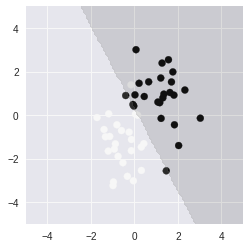

In [0]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
y = model.classify(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

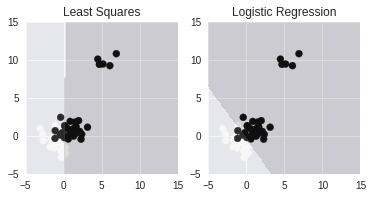

In [0]:
x_train, y_train = create_toy_data(add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regressor = LogisticRegressor()
logistic_regressor.fit(X_train, y_train)
y_lr = logistic_regressor.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

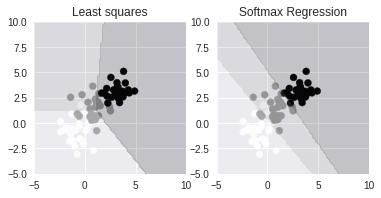

In [0]:
x_train, y_train = create_toy_data(add_class=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regressor = SoftmaxRegressor()
logistic_regressor.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y_lr = logistic_regressor.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Softmax Regression")
plt.show()

#*Fisher's linear discriminant*

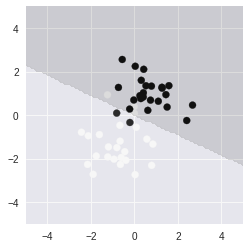

In [0]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

model = LinearDiscriminantAnalyzer()
model.fit(x_train, y_train)
y = model.classify(x_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#*Logistic Regression*

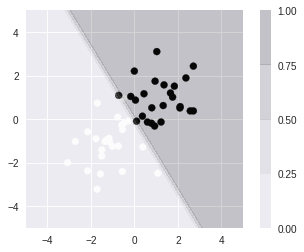

In [0]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LogisticRegressor()
model.fit(X_train, y_train)
y = model.proba(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#*Multiclass logistic regression*

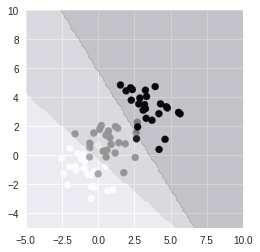

In [0]:
x_train, y_train = create_toy_data(add_class=True)
x1, x2 = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x = np.array([x1, x2]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X = feature.transform(x)

model = SoftmaxRegressor()
model.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y = model.classify(X)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1, x2, y.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#*Bayesian Logistic Regression*

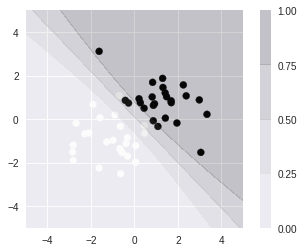

In [0]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianLogisticRegressor(alpha=1.)
model.fit(X_train, y_train, max_iter=1000)
y = model.proba(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()